<a href="https://colab.research.google.com/github/r2barati/seminar2/blob/main/N_BEATS_100_TS_Synthetic_Simple_Step_1_Training_Handling_Differing_Length_Only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of the generated DataFrame: (195, 100)
Features of the generated data (first 5 rows):
    Series_1   Series_2   Series_3  Series_4   Series_5  Series_6   Series_7  \
0  -9.327441  11.423092  -2.825285  2.330483  -0.151815 -1.424753  11.171469   
1  -2.375457  -7.498686   5.278524 -3.261692   3.443441 -0.079574   3.605343   
2  13.168079   2.334551   7.570611  0.964157   4.479602  2.756967  -2.350313   
3  15.900696  -5.701623  10.825499  4.053478   7.357601  2.266504   6.747471   
4  18.138833   5.327106  -2.416645  4.424274  11.525865  1.214222   8.393945   

    Series_8   Series_9  Series_10  ...  Series_91  Series_92  Series_93  \
0  -2.643089  -0.159391  -5.132017  ...   2.923726   8.293056  -0.796310   
1  -2.525915   6.421318  -2.245719  ...   2.745162  -6.100878   7.573424   
2   0.355267  12.256046   8.989627  ...  17.081198  18.234781  16.578116   
3   4.652679  19.287018  14.442071  ...   2.198048   8.380880  37.802086   
4  17.857442  30.295637  23.897684  ...  12.763

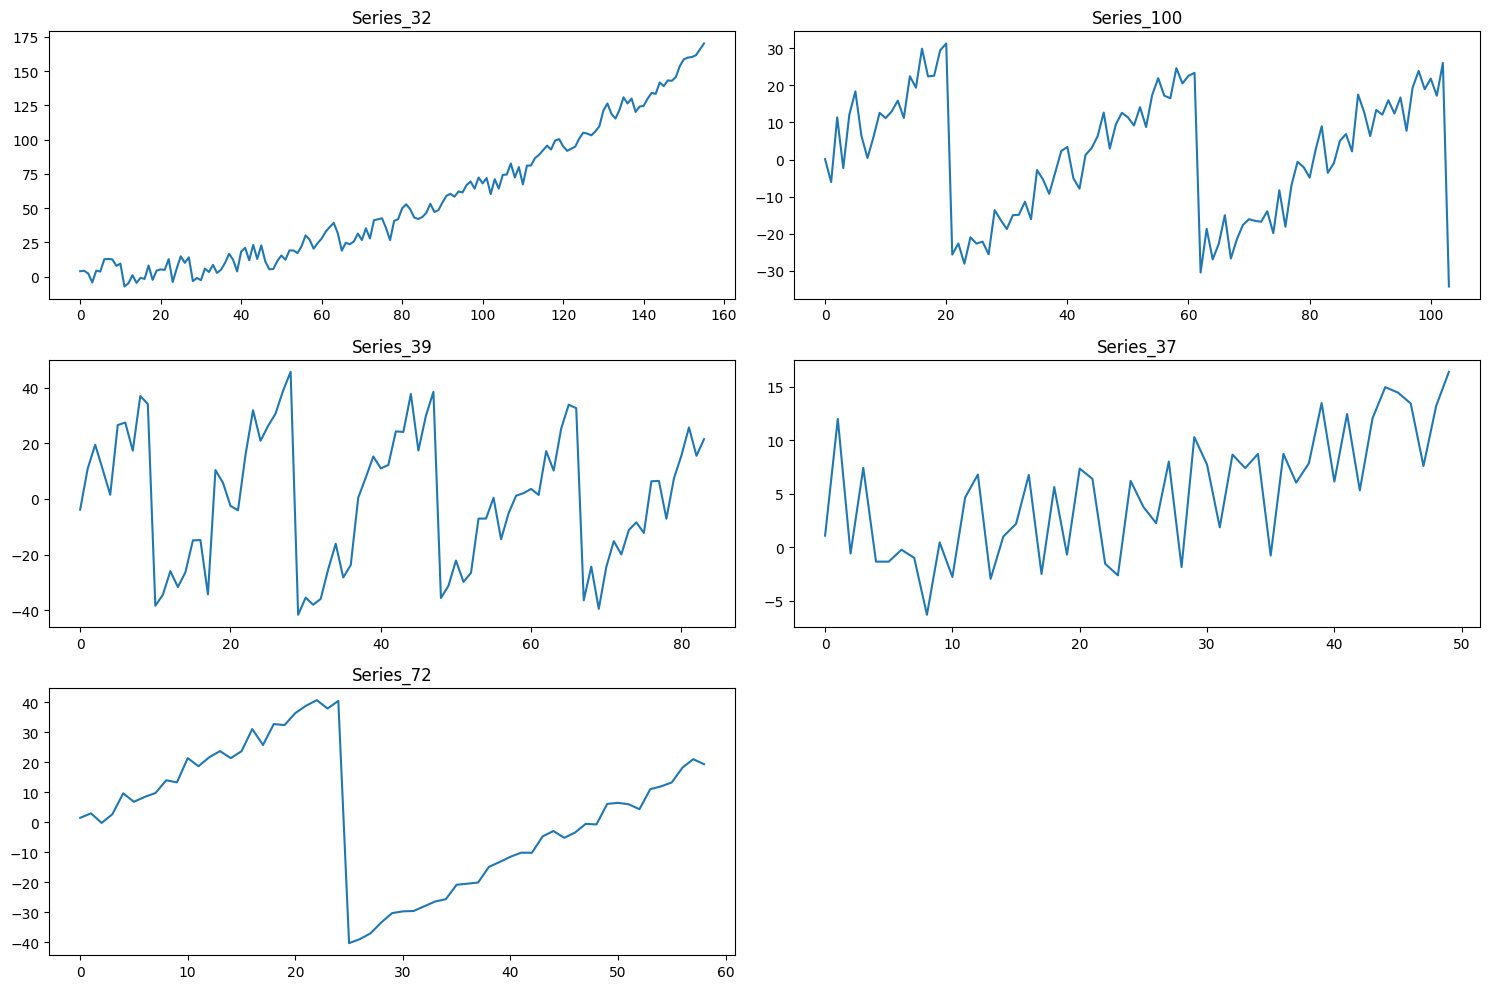

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_synthetic_series(length, trend_type, seasonality_type, noise_level, anomaly_level=0):
    """
    Generates a single synthetic time series with specific characteristics.

    :param length: Length of the time series (int, minimum value of 50, maximum value of 200)
    :param trend_type: Type of trend ('linear', 'exponential', 'quadratic', 'none')
    :param seasonality_type: Type of seasonality ('sine', 'sawtooth', 'none')
    :param noise_level: Level of noise to add (float, usually between 1 and 10)
    :param anomaly_level: Level of anomalies or sudden spikes to introduce into the series (0 for no anomalies)
    :return: A numpy array representing the time series
    """
    time = np.arange(length)  # Generate time index

    # Generate trend component based on the chosen trend type
    if trend_type == 'linear':
        # Linear trend with a random slope between 0.1 and 1.0
        trend = time * np.random.uniform(0.1, 1.0)
    elif trend_type == 'exponential':
        # Exponential trend with a random growth rate between 0.01 and 0.05
        trend = np.exp(time * np.random.uniform(0.01, 0.05))
    elif trend_type == 'quadratic':
        # Quadratic trend with a random coefficient between 0.001 and 0.01
        trend = (time ** 2) * np.random.uniform(0.001, 0.01)
    else:
        # No trend if 'none' is selected
        trend = np.zeros(length)

    # Generate seasonality component based on the chosen seasonality type
    if seasonality_type == 'sine':
        # Sine wave with a random period between 10 and 50 and amplitude between 5 and 50
        period = np.random.uniform(10, 50)
        seasonality = np.sin(time / period * 2 * np.pi) * np.random.uniform(5, 50)
    elif seasonality_type == 'sawtooth':
        # Sawtooth wave to introduce a more abrupt, non-smooth seasonality
        period = np.random.uniform(10, 50)
        seasonality = (2 * (time / period - np.floor(0.5 + time / period))) * np.random.uniform(5, 50)
    else:
        # No seasonality if 'none' is selected
        seasonality = np.zeros(length)

    # Generate random noise from a normal distribution with mean 0 and standard deviation noise_level
    noise = np.random.normal(0, noise_level, length)

    # Introduce anomalies: sudden spikes in the series, controlled by the anomaly_level
    anomalies = np.zeros(length)
    if anomaly_level > 0:
        num_anomalies = int(length * 0.05)  # 5% of the series length as anomalies
        anomaly_indices = np.random.choice(time, num_anomalies, replace=False)
        anomalies[anomaly_indices] = np.random.uniform(-anomaly_level, anomaly_level, num_anomalies)

    # Combine trend, seasonality, noise, and anomalies to create the final series
    series = trend + seasonality + noise + anomalies
    return series

# Define parameters for generating multiple time series
num_series = 100  # Number of time series to generate
min_length = 50   # Minimum length of each time series
max_length = 200  # Maximum length of each time series

# Ensure the minimum length is enough to accommodate input_window and forecast_horizon
min_length = max(min_length, input_window + forecast_horizon)

# List to store each generated time series
time_series_list = []
for i in range(num_series):
    # Randomly determine the length of the series between the specified min and max
    length = np.random.randint(min_length, max_length)

    # Randomly select trend type: now includes 'quadratic' for added complexity
    trend_type = np.random.choice(['linear', 'exponential', 'quadratic', 'none'])

    # Randomly select seasonality type: now includes 'sawtooth' for a less smooth periodic pattern
    seasonality_type = np.random.choice(['sine', 'sawtooth', 'none'])

    # Randomly select noise level between 1 and 10
    noise_level = np.random.uniform(1, 10)

    # Introduce a random anomaly level (spikes) between 0 and 20 for some series
    anomaly_level = np.random.uniform(0, 20)

    # Generate a synthetic time series with the specified characteristics
    series = generate_synthetic_series(length, trend_type, seasonality_type, noise_level, anomaly_level)

    # Convert the series to a pandas Series object and append to the list
    time_series_list.append(pd.Series(series, name=f'Series_{i+1}'))

# Convert the list of time series into a pandas DataFrame for easier manipulation
time_series_df = pd.DataFrame(time_series_list).T

# Print the shape of the generated DataFrame (rows, columns)
print("Shape of the generated DataFrame:", time_series_df.shape)

# Display the first 5 rows to show the structure of the generated data
print("Features of the generated data (first 5 rows):")
print(time_series_df.head())

# Select 5 random time series from the DataFrame to visualize
random_series = np.random.choice(time_series_df.columns, 5, replace=False)

# Create a figure with subplots for each randomly selected series
plt.figure(figsize=(15, 10))
for i, series in enumerate(random_series, 1):
    # Create a subplot for each time series
    plt.subplot(3, 2, i)
    # Plot the selected time series
    plt.plot(time_series_df[series])
    # Set the title of the subplot to the name of the series
    plt.title(series)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
# Display the plot with the 5 random time series
plt.show()


In [3]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Parameters
input_window = 24    # Length of the input sequence (input data window for training)
forecast_horizon = 4  # Length of the forecast horizon (how many future points to predict)
batch_size = 32      # Batch size for DataLoader (number of samples per batch during training)
test_size = 0.2      # Fraction of the data to use for validation (80% train, 20% valid)

# Step 1: Create Rolling Windows on the Raw Data
def create_rolling_windows(series, input_window, forecast_horizon):
    """
    Creates rolling windows for input and forecast.

    :param series: The time series to process
    :param input_window: Length of the input window (X)
    :param forecast_horizon: Number of future points to predict (y)
    :return: Two arrays, one for inputs (X) and one for targets (y)
    """
    # Ensure that the series is long enough to create rolling windows
    if len(series) < input_window + forecast_horizon:
        return np.array([]), np.array([])  # Return empty arrays if the series is too short

    X, y = [], []
    # Loop over the series to create input (X) and target (y) pairs
    for i in range(len(series) - input_window - forecast_horizon + 1):
        X.append(series[i:i + input_window])  # Input window (past values)
        y.append(series[i + input_window:i + input_window + forecast_horizon])  # Forecast horizon (future values)
    return np.array(X), np.array(y)

# Create rolling windows for all series in the dataset.
X_all, y_all = [], []
for col in time_series_df.columns:
    series = time_series_df[col].dropna().values  # Convert each series to a numpy array

    # Create rolling windows for this series
    X, y = create_rolling_windows(series, input_window, forecast_horizon)

    if len(X) > 0:
        X_all.append(X)  # Append input sequences
        y_all.append(y)  # Append corresponding targets

# Concatenate all rolling windows across all series
X_all = np.concatenate(X_all, axis=0)  # Combine all input sequences
y_all = np.concatenate(y_all, axis=0)  # Combine all target sequences

# Step 2: Split data into training and validation sets
# We split both the input data (X) and target data (y) into train and valid sets.
X_train, X_valid, y_train, y_valid = train_test_split(X_all, y_all, test_size=test_size, shuffle=True, random_state=42)

# Step 3: Normalize based on training data statistics
# Compute mean and standard deviation of the training set
train_mean = X_train.mean()  # Compute mean across all training data
train_std = X_train.std()    # Compute standard deviation across all training data

# Normalize training and validation sets using training mean and std
X_train = (X_train - train_mean) / train_std  # Normalize training inputs
X_valid = (X_valid - train_mean) / train_std  # Normalize validation inputs using the same mean and std

# We do not normalize y (targets) here since predictions are made on actual values

# Step 4: Convert the data to PyTorch tensors
# Convert inputs and targets to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_valid_tensor = torch.tensor(X_valid, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid, dtype=torch.float32)

# Step 5: Create DataLoader for efficient batching during training and validation
# TensorDataset for training and validation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
valid_dataset = TensorDataset(X_valid_tensor, y_valid_tensor)

# DataLoaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Example: Inspect the shape of the first batch from the training DataLoader
for batch_idx, (inputs, targets) in enumerate(train_dataloader):
    print(f'Training batch - Input batch shape: {inputs.shape}')  # Should be (batch_size, 24)
    print(f'Training batch - Target batch shape: {targets.shape}')  # Should be (batch_size, 4)
    break  # Stop after inspecting the first batch

# Example: Inspect the shape of the first batch from the validation DataLoader
for batch_idx, (inputs, targets) in enumerate(valid_dataloader):
    print(f'Validation batch - Input batch shape: {inputs.shape}')  # Should be (batch_size, 24)
    print(f'Validation batch - Target batch shape: {targets.shape}')  # Should be (batch_size, 4)
    break  # Stop after inspecting the first batch


Training batch - Input batch shape: torch.Size([32, 24])
Training batch - Target batch shape: torch.Size([32, 4])
Validation batch - Input batch shape: torch.Size([32, 24])
Validation batch - Target batch shape: torch.Size([32, 4])


In [26]:
import torch
import torch.nn as nn

# Define the NBeatsBlock
class NBeatsBlock(nn.Module):
    def __init__(self, input_size, output_size, hidden_units):
        super(NBeatsBlock, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.fc2 = nn.Linear(hidden_units, hidden_units)
        self.fc3 = nn.Linear(hidden_units, hidden_units)
        self.fc4 = nn.Linear(hidden_units, hidden_units)
        self.backcast = nn.Linear(hidden_units, input_size)  # Output of the backcast
        self.forecast = nn.Linear(hidden_units, output_size)  # Output of the forecast

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return self.backcast(x), self.forecast(x)

# Define the N-BEATS model
class NBeatsModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_units, stack_depth):
        super(NBeatsModel, self).__init__()
        self.blocks = nn.ModuleList(
            [NBeatsBlock(input_size, output_size, hidden_units) for _ in range(stack_depth)]
        )

    def forward(self, x):
        forecast = 0
        for block in self.blocks:
            backcast, block_forecast = block(x)
            forecast += block_forecast  # Sum up all forecasts from different blocks
            x = x - backcast  # Subtract backcast component from input (residual connection)
        return forecast

# Example usage:
input_size = 24  # The size of the input window
output_size = 4  # Forecast horizon
hidden_units = 512  # Number of hidden units in each block
stack_depth = 3  # Number of stacked N-BEATS blocks

model = NBeatsModel(input_size=input_size, output_size=output_size, hidden_units=hidden_units, stack_depth=stack_depth)

# Sample input (batch_size=32, input_window=24)
x = torch.randn(32, input_size)  # Batch size of 32, input sequence of length 24
forecast = model(x)

print(f"Forecast shape: {forecast.shape}")  # Should be (32, 4), i.e., (batch_size, forecast_horizon)


Forecast shape: torch.Size([32, 4])


In [39]:
import torch
import torch.nn as nn
from torch.optim import Adam

# Define the N-BEATS model and block (already provided)
class NBeatsBlock(nn.Module):
    def __init__(self, input_size, output_size, hidden_units):
        super(NBeatsBlock, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.fc2 = nn.Linear(hidden_units, hidden_units)
        self.fc3 = nn.Linear(hidden_units, hidden_units)
        self.fc4 = nn.Linear(hidden_units, hidden_units)
        self.backcast = nn.Linear(hidden_units, input_size)  # Output of the backcast
        self.forecast = nn.Linear(hidden_units, output_size)  # Output of the forecast

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        return self.backcast(x), self.forecast(x)

class NBeatsModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_units, stack_depth):
        super(NBeatsModel, self).__init__()
        self.blocks = nn.ModuleList(
            [NBeatsBlock(input_size, output_size, hidden_units) for _ in range(stack_depth)]
        )

    def forward(self, x):
        forecast = 0
        for block in self.blocks:
            backcast, block_forecast = block(x)
            forecast += block_forecast  # Sum up all forecasts from different blocks
            x = x - backcast  # Subtract backcast component from input (residual connection)
        return forecast

# Hyperparameters
input_size = 24  # Length of input sequence
output_size = 4  # Length of forecast horizon
hidden_units = 512  # Number of hidden units in each N-BEATS block
stack_depth = 3  # Number of N-BEATS blocks in the model
epochs = 50  # Number of training epochs
batch_size = 32  # Batch size
learning_rate = 0.001  # Learning rate for optimizer

# Initialize the model
nbeats_model = NBeatsModel(input_size=input_size, output_size=output_size, hidden_units=hidden_units, stack_depth=stack_depth)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss for regression tasks
optimizer = Adam(nbeats_model.parameters(), lr=learning_rate)  # Adam optimizer

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
nbeats_model = nbeats_model.to(device)

# Training loop
for epoch in range(epochs):
    nbeats_model.train()  # Set model to training mode
    running_loss = 0.0

    # Iterate over the training dataset
    for i, (inputs, targets) in enumerate(train_dataloader):
        # Move inputs and targets to the device (GPU/CPU)
        inputs, targets = inputs.to(device), targets.to(device)

        # Ensure inputs have shape [batch_size, input_size]
        if inputs.ndim == 3 and inputs.size(2) == 1:  # If input shape is [batch_size, input_size, 1]
            inputs = inputs.squeeze(2)  # Remove the last 1-sized dimension

        # Ensure targets have shape [batch_size, output_size]
        if targets.ndim == 3 and targets.size(2) == 1:  # If target shape is [batch_size, output_size, 1]
            targets = targets.squeeze(2)  # Remove the last 1-sized dimension

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = nbeats_model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets)

        # Backward pass (compute gradients)
        loss.backward()

        # Update the model parameters
        optimizer.step()

        # Accumulate the running loss
        running_loss += loss.item()

    # Print average loss per epoch
    avg_loss = running_loss / len(train_dataloader)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

# After training the model (you can refer to the earlier training code):
torch.save(nbeats_model.state_dict(), 'nbeats_model.pth')  # Save the model weights to a file
print("Model saved to 'nbeats_model.pth'")


Epoch [1/50], Loss: 38235.9150
Epoch [2/50], Loss: 18385.6969
Epoch [3/50], Loss: 13341.8610
Epoch [4/50], Loss: 4993.8189
Epoch [5/50], Loss: 6478.8309
Epoch [6/50], Loss: 3056.2878
Epoch [7/50], Loss: 4194.5334
Epoch [8/50], Loss: 2382.4885
Epoch [9/50], Loss: 2224.8107
Epoch [10/50], Loss: 1878.9385
Epoch [11/50], Loss: 1620.4819
Epoch [12/50], Loss: 1559.9049
Epoch [13/50], Loss: 1249.2588
Epoch [14/50], Loss: 1284.6207
Epoch [15/50], Loss: 1089.6033
Epoch [16/50], Loss: 1028.0241
Epoch [17/50], Loss: 938.2736
Epoch [18/50], Loss: 836.1706
Epoch [19/50], Loss: 802.9958
Epoch [20/50], Loss: 715.3840
Epoch [21/50], Loss: 647.0015
Epoch [22/50], Loss: 570.3740
Epoch [23/50], Loss: 502.3963
Epoch [24/50], Loss: 432.8851
Epoch [25/50], Loss: 430.5315
Epoch [26/50], Loss: 432.9261
Epoch [27/50], Loss: 389.2497
Epoch [28/50], Loss: 386.6432
Epoch [29/50], Loss: 338.1520
Epoch [30/50], Loss: 324.8798
Epoch [31/50], Loss: 316.5709
Epoch [32/50], Loss: 310.7468
Epoch [33/50], Loss: 285.6196


<ipython-input-43-78007ef51945>:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nbeats_model.load_state_dict(torch.load('nbeats_model.pth'))  # Load pre-trained model weig

Mean Squared Error (MSE): 11050.6930


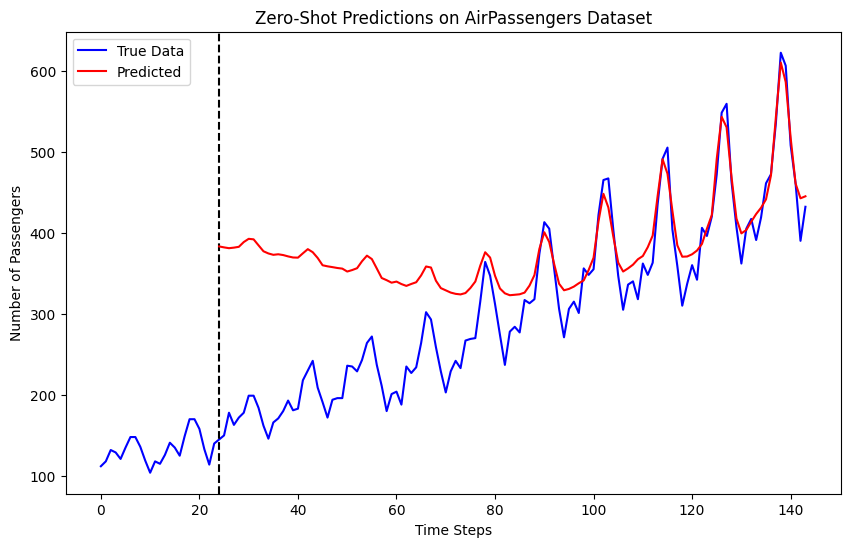

In [43]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load the AirPassengers Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
air_passengers = pd.read_csv(url, usecols=[1])  # Only load the passenger counts
data = air_passengers.values.astype(float)

# Step 2: Standard Normalize the Data (z-score normalization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Prepare Data for Testing
input_window = 24
forecast_horizon = 4

def create_test_rolling_window(data, input_window):
    X_test = []
    for i in range(len(data) - input_window):
        X_test.append(data[i:i + input_window])
    return np.array(X_test)

X_test = create_test_rolling_window(scaled_data, input_window)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Load the Pretrained N-BEATS Model
nbeats_model = NBeatsModel(input_size=input_window, output_size=forecast_horizon, hidden_units=512, stack_depth=3)
nbeats_model.load_state_dict(torch.load('nbeats_model.pth'))  # Load pre-trained model weights
nbeats_model = nbeats_model.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
nbeats_model.eval()  # Set the model to evaluation mode

# Run Zero-Shot Predictions
with torch.no_grad():
    predictions = []
    for i in range(X_test_tensor.size(0)):
        input_data = X_test_tensor[i].unsqueeze(0)  # Add batch dimension
        input_data = input_data.squeeze(-1)  # Remove the extra dimension if it's [1, 24, 1]
        forecast = nbeats_model(input_data.to(torch.device('cuda' if torch.cuda.is_available() else 'cpu')))
        predictions.append(forecast.cpu().numpy())

# Convert predictions back to the original scale (reverse the standard normalization)
predictions = np.concatenate(predictions, axis=0)
predictions_rescaled = scaler.inverse_transform(predictions)

# Extract true values for comparison (shifted by input_window to match the prediction)
true_values = data[input_window:input_window + len(predictions_rescaled), 0]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(true_values, predictions_rescaled[:, 0])
print(f'Mean Squared Error (MSE): {mse:.4f}')

# Visualize the Predictions
plt.figure(figsize=(10, 6))

# Plot the true values (blue line)
plt.plot(range(len(data)), data, label='True Data', color='blue')

# Plot a vertical line to separate the true data and predicted data
plt.axvline(x=input_window, color='black', linestyle='--')

# Plot the predictions (red line)
plt.plot(range(input_window, input_window + len(predictions_rescaled)), predictions_rescaled[:, 0], label='Predicted', color='red')

plt.title('Zero-Shot Predictions on AirPassengers Dataset')
plt.xlabel('Time Steps')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
